In [3]:
import pandas as pd


In [4]:
# building_permits_2023 = pd.read_csv("../Building_Permits_in_2023.csv")
# building_permits_2022 = pd.read_csv("../Building_Permits_in_2022.csv")
# building_permits = pd.concat(
#     [
#         building_permits_2022,
#         building_permits_2023,
#     ],
#     axis=0,
# )

import os
# Get the path to the directory where the script is located
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Construct the file paths to the CSV files
csv_file_path_2022 = os.path.join(script_dir, '..', 'data', 'Building_Permits_in_2022.csv')
csv_file_path_2023 = os.path.join(script_dir, '..', 'data', 'Building_Permits_in_2023.csv')

# Read the CSV files into DataFrames
building_permits_2022 = pd.read_csv(csv_file_path_2022)
building_permits_2023 = pd.read_csv(csv_file_path_2023)

# Concatenate the DataFrames
building_permits = pd.concat([building_permits_2022, building_permits_2023], axis=0)



In [5]:
print(building_permits.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58093 entries, 0 to 10185
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            58093 non-null  float64
 1   Y                            58093 non-null  float64
 2   OBJECTID                     58093 non-null  int64  
 3   DCRAINTERNALNUMBER           58093 non-null  float64
 4   ISSUE_DATE                   58093 non-null  object 
 5   PERMIT_ID                    58093 non-null  object 
 6   PERMIT_TYPE_NAME             58093 non-null  object 
 7   PERMIT_SUBTYPE_NAME          57246 non-null  object 
 8   PERMIT_CATEGORY_NAME         3334 non-null   object 
 9   APPLICATION_STATUS_NAME      58093 non-null  object 
 10  FULL_ADDRESS                 58093 non-null  object 
 11  DESC_OF_WORK                 22961 non-null  object 
 12  SSL                          56261 non-null  object 
 13  ZONING          

In [6]:
building_permits["PERMIT_CATEGORY_NAME"].unique()

array([nan, 'AFTER HOURS', 'EXTENSION', 'HISTORIC PROPERTY',
       'SOIL BORING', 'SCAFFOLDING', 'ANTENNA', 'TOWER CRANE',
       'FUEL BURNING', 'UNDERGROUND STORAGE TANK', 'TENT',
       'MINIATURE BOILER'], dtype=object)

In [7]:
building_permits = building_permits[building_permits["APPLICATION_STATUS_NAME"] == 'PERMIT ISSUED']

In [8]:
building_permits.shape

(48301, 44)

In [9]:
building_permits.isnull().sum()

X                                  0
Y                                  0
OBJECTID                           0
DCRAINTERNALNUMBER                 0
ISSUE_DATE                         0
PERMIT_ID                          0
PERMIT_TYPE_NAME                   0
PERMIT_SUBTYPE_NAME              845
PERMIT_CATEGORY_NAME           45017
APPLICATION_STATUS_NAME            0
FULL_ADDRESS                       0
DESC_OF_WORK                   28182
SSL                             1764
ZONING                          3662
PERMIT_APPLICANT               25473
FEE_TYPE                        4438
FEES_PAID                          0
OWNER_NAME                      2672
LASTMODIFIEDDATE                   0
CITY                           48301
STATE                          48301
LATITUDE                           0
LONGITUDE                          0
XCOORD                             0
YCOORD                             0
ZIPCODE                        48301
MARADDRESSREPOSITORYID             0
D

In [10]:
# dropping entirely null columns
building_permits.dropna(axis=1, how='all', inplace=True)

In [11]:
# Remove unnecessary columns
columns_to_drop = [
    "OBJECTID", # Not Useful in the analysis
    "GLOBALID", # Not Useful in the analysis
    "CREATED_USER", # Not Useful in the analysis
    "LAST_EDITED_USER", # Not Useful in the analysis
    'DCRAINTERNALNUMBER', # Not Useful in the analysis
    'APPLICATION_STATUS_NAME', # As we are keeping obeservations APPLICATION_STATUS_NAME == 'Permit Issued' 
    'BUSINESSIMPROVEMENTDISTRICT', # mostly nulls

]
building_permits.drop(columns=columns_to_drop, inplace=True)

In [12]:
building_permits.columns

Index(['X', 'Y', 'ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME',
       'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME', 'FULL_ADDRESS',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD',
       'DISTRICT', 'PSA', 'NEIGHBORHOODCLUSTER', 'CREATED_DATE',
       'LAST_EDITED_DATE'],
      dtype='object')

In [13]:
building_permits['ISSUE_DATE'] = pd.to_datetime(building_permits['ISSUE_DATE'])
building_permits['LASTMODIFIEDDATE'] = pd.to_datetime(building_permits['LASTMODIFIEDDATE'])
building_permits['CREATED_DATE'] = pd.to_datetime(building_permits['CREATED_DATE'])
building_permits['LAST_EDITED_DATE'] = pd.to_datetime(building_permits['LAST_EDITED_DATE']) 

In [14]:
building_permits.isnull().sum()

X                             0
Y                             0
ISSUE_DATE                    0
PERMIT_ID                     0
PERMIT_TYPE_NAME              0
PERMIT_SUBTYPE_NAME         845
PERMIT_CATEGORY_NAME      45017
FULL_ADDRESS                  0
DESC_OF_WORK              28182
SSL                        1764
ZONING                     3662
PERMIT_APPLICANT          25473
FEE_TYPE                   4438
FEES_PAID                     0
OWNER_NAME                 2672
LASTMODIFIEDDATE              0
LATITUDE                      0
LONGITUDE                     0
XCOORD                        0
YCOORD                        0
MARADDRESSREPOSITORYID        0
WARD                          0
ANC                           0
SMD                           0
DISTRICT                      0
PSA                           0
NEIGHBORHOODCLUSTER           0
CREATED_DATE                  0
LAST_EDITED_DATE              0
dtype: int64

In [15]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48301 entries, 3 to 10185
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   X                       48301 non-null  float64            
 1   Y                       48301 non-null  float64            
 2   ISSUE_DATE              48301 non-null  datetime64[ns, UTC]
 3   PERMIT_ID               48301 non-null  object             
 4   PERMIT_TYPE_NAME        48301 non-null  object             
 5   PERMIT_SUBTYPE_NAME     47456 non-null  object             
 6   PERMIT_CATEGORY_NAME    3284 non-null   object             
 7   FULL_ADDRESS            48301 non-null  object             
 8   DESC_OF_WORK            20119 non-null  object             
 9   SSL                     46537 non-null  object             
 10  ZONING                  44639 non-null  object             
 11  PERMIT_APPLICANT        22828 non-null  o

In [16]:
duplicate_rows = building_permits.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [17]:
def get_duplicate_column_pairs(df):
    duplicate_column_pairs = {}
    for i in range(len(df.columns)):
        for j in range(i + 1, len(df.columns)):
            if df.iloc[:, i].equals(df.iloc[:, j]):
                duplicate_column_pairs[df.columns[j]] = df.columns[i]
    return duplicate_column_pairs

In [18]:
duplicate_column_pairs = get_duplicate_column_pairs(building_permits)
print(f"Duplicate column pairs: {duplicate_column_pairs}")

Duplicate column pairs: {'LAST_EDITED_DATE': 'CREATED_DATE'}


In [19]:
building_permits.drop(columns=['LAST_EDITED_DATE'], inplace=True)

In [20]:
building_permits.shape

(48301, 28)

In [21]:
building_permits.to_csv("../Data/building_permits.csv")

In [22]:
building_permits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48301 entries, 3 to 10185
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   X                       48301 non-null  float64            
 1   Y                       48301 non-null  float64            
 2   ISSUE_DATE              48301 non-null  datetime64[ns, UTC]
 3   PERMIT_ID               48301 non-null  object             
 4   PERMIT_TYPE_NAME        48301 non-null  object             
 5   PERMIT_SUBTYPE_NAME     47456 non-null  object             
 6   PERMIT_CATEGORY_NAME    3284 non-null   object             
 7   FULL_ADDRESS            48301 non-null  object             
 8   DESC_OF_WORK            20119 non-null  object             
 9   SSL                     46537 non-null  object             
 10  ZONING                  44639 non-null  object             
 11  PERMIT_APPLICANT        22828 non-null  o

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [24]:
coordinates = building_permits[['LATITUDE', 'LONGITUDE']]


In [25]:
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

In [26]:
inertia_values = []
silhouette_scores = []
k_range = range(4, 15)  # Test K values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_coordinates)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(
        silhouette_score(scaled_coordinates, kmeans.labels_)
    )

# Plot the inertia values and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(k_range, inertia_values, marker="o")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Inertia")
ax1.set_title("Elbow Method")

ax2.plot(k_range, silhouette_scores, marker="o")
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Scores")
plt.show()


/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [27]:
optimal_k = 7  # the optimal K based on the Elbow method and Silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_coordinates)


/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [28]:
building_permits['cluster'] = kmeans.labels_


In [31]:
! pip install folium
import folium

# Calculate the center of the map based on the average latitude and longitude
map_center = [building_permits['LATITUDE'].mean(), building_permits['LONGITUDE'].mean()]

# Create a Folium map
m = folium.Map(location=map_center, zoom_start=12)

# Define a color map for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', 'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen', 'gray', 'black', 'lightgray']

# Add the data points to the map
for index, row in building_permits.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=5,
        popup=f"Cluster: {row['cluster']}",
        color=colors[row['cluster']],
        fill=True,
        fill_opacity=0.1
    ).add_to(m)

# Save the map as an HTML file
m.save("map.html")

  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)


KeyboardInterrupt: 

In [32]:
building_permits.cluster.unique()

array([1, 4, 2, 5, 3, 6, 0], dtype=int32)

In [33]:
cluster_density = building_permits.groupby('cluster')['PERMIT_ID'].count()
print(cluster_density)

cluster
0     3592
1     7846
2    11766
3     5859
4     4285
5    11196
6     3757
Name: PERMIT_ID, dtype: int64


In [34]:
building_permits_2022[['LASTMODIFIEDDATE', 'ISSUE_DATE', 'PERMIT_ID']].head()

,LASTMODIFIEDDATE,ISSUE_DATE,PERMIT_ID
0,2022/04/29 12:26:17+00,2022/02/23 05:00:00+00,E59783244
1,2022/04/29 12:26:34+00,2022/02/23 05:00:00+00,E49961806
2,2022/04/29 12:26:52+00,2022/02/23 05:00:00+00,E30487069
3,2023/04/15 13:57:47+00,2022/09/27 04:00:00+00,BP2205285
4,2023/04/14 14:07:22+00,2022/04/19 04:00:00+00,M2202353


In [35]:
building_permits_2022.columns


Index(['X', 'Y', 'OBJECTID', 'DCRAINTERNALNUMBER', 'ISSUE_DATE', 'PERMIT_ID',
       'PERMIT_TYPE_NAME', 'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME',
       'APPLICATION_STATUS_NAME', 'FULL_ADDRESS', 'DESC_OF_WORK', 'SSL',
       'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE', 'FEES_PAID', 'OWNER_NAME',
       'LASTMODIFIEDDATE', 'CITY', 'STATE', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'ZIPCODE', 'MARADDRESSREPOSITORYID', 'DCSTATADDRESSKEY',
       'DCSTATLOCATIONKEY', 'WARD', 'ANC', 'SMD', 'DISTRICT', 'PSA',
       'NEIGHBORHOODCLUSTER', 'HOTSPOT2006NAME', 'HOTSPOT2005NAME',
       'HOTSPOT2004NAME', 'BUSINESSIMPROVEMENTDISTRICT', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')

In [36]:
#import pandas as pd
# import holoviews as hv
from shapely.geometry import Point
import geopandas as gpd

In [37]:
# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(building_permits.LONGITUDE, building_permits.LATITUDE)]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(building_permits, crs=crs, geometry=geometry)

# Buffer the points by 0.5 miles (about 804.5 meters)
buffered_geo_df = geo_df.to_crs({'init': 'epsg:3857'})
buffered_geo_df['geometry'] = buffered_geo_df['geometry'].buffer(804.5)
buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})

/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is dep

In [38]:
buffered_geo_df.head()

,X,Y,ISSUE_DATE,PERMIT_ID,PERMIT_TYPE_NAME,PERMIT_SUBTYPE_NAME,PERMIT_CATEGORY_NAME,FULL_ADDRESS,DESC_OF_WORK,SSL,...,MARADDRESSREPOSITORYID,WARD,ANC,SMD,DISTRICT,PSA,NEIGHBORHOODCLUSTER,CREATED_DATE,cluster,geometry
3,-77.013368,38.966306,2022-09-27 04:00:00+00:00,BP2205285,POST CARD,BUILDING,NaN,"121 SHERIDAN ST NW, WASHINGTON, DC 20011",NaN,3372 0019,...,245568,4,ANC 4B,4B07,FOURTH,406,Cluster 17,2023-04-17 10:36:16+00:00,1,"POLYGON ((-77.00614 38.96630, -77.00617 38.965..."
4,-77.001663,38.956660,2022-04-19 04:00:00+00:00,M2202353,SUPPLEMENTAL,MECHANICAL,NaN,"5549 SOUTH DAKOTA AVE NE, WASHINGTON, DC 20011",NaN,3760 0843,...,299743,4,ANC 4B,4B09,FOURTH,406,Cluster 19,2023-04-17 10:36:16+00:00,1,"POLYGON ((-76.99443 38.95665, -76.99447 38.956..."
6,-76.967832,38.925094,2022-07-16 04:00:00+00:00,BP2204165,POST CARD,BUILDING,NaN,"2723 28TH ST NE, WASHINGTON, DC 20018",NaN,4346 0017,...,45057,5,ANC 5C,5C02,FIFTH,503,Cluster 22,2023-04-17 10:36:16+00:00,4,"POLYGON ((-76.96060 38.92509, -76.96064 38.924..."
7,-77.036963,38.911326,2022-07-16 04:00:00+00:00,E2209361,SUPPLEMENTAL,ELECTRICAL,NaN,"1600 16TH ST NW, WASHINGTON, DC 20009",NaN,0179 0817,...,241998,2,ANC 2B,2B04,THIRD,301,Cluster 6,2023-04-17 10:36:16+00:00,2,"POLYGON ((-77.02973 38.91132, -77.02977 38.910..."
8,-77.013943,38.941851,2022-07-16 04:00:00+00:00,E2209362,SUPPLEMENTAL,ELECTRICAL,NaN,"209 ROCK CREEK CHURCH RD NW, WASHINGTON, DC 20011",NaN,3316 0046,...,244314,4,ANC 4C,4C06,FOURTH,407,Cluster 18,2023-04-17 10:36:16+00:00,1,"POLYGON ((-77.00671 38.94184, -77.00675 38.941..."


In [39]:
buffered_geo_df.columns

Index(['X', 'Y', 'ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME',
       'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME', 'FULL_ADDRESS',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD',
       'DISTRICT', 'PSA', 'NEIGHBORHOODCLUSTER', 'CREATED_DATE', 'cluster',
       'geometry'],
      dtype='object')

In [40]:
from geopandas.tools import sjoin

# buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})
# join_df = sjoin(buffered_geo_df, buffered_geo_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
# construction_count = join_df.groupby('index_left').size()
# buffered_geo_df['construction_count'] = construction_count
# buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})


In [41]:
# Initializing the construction_count column
buffered_geo_df['construction_count'] = 0

# Dividing the dataset into smaller chunks
chunk_size = 1000
chunks = [buffered_geo_df[i:i + chunk_size] for i in range(0, buffered_geo_df.shape[0], chunk_size)]

buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})

# Calculating the construction_count for each chunk
for chunk in chunks:
    chunk = chunk.to_crs({'init': 'epsg:3857'})
    
    # Setting the index explicitly for both DataFrames
    chunk.index.name = 'index_left'
    buffered_geo_df.index.name = 'index_right'
    
    join_df = sjoin(chunk, buffered_geo_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
    construction_count = join_df.groupby('index_left').size()
    
    # Updating the construction_count in the original buffered_geo_df
    for index, count in construction_count.items():
        buffered_geo_df.loc[index, 'construction_count'] = count

buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:4326'})

/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is de

KeyboardInterrupt: 

In [42]:
import numpy as np
from sklearn.neighbors import BallTree

# Convert the coordinates to radians
coords = np.radians(buffered_geo_df[['LATITUDE', 'LONGITUDE']].values)

# Earth's mean radius in meters
earth_radius = 6371000

# Create a BallTree for efficient distance calculations
ball_tree = BallTree(coords, metric='haversine')

# Find the number of points within a 0.5-mile radius (about 804.5 meters)
radius = 804.5 / earth_radius

# Query the BallTree for the construction count within the radius
buffered_geo_df['construction_count'] = ball_tree.query_radius(coords, r=radius, count_only=True)

In [43]:
l = [cnt for cnt in buffered_geo_df.construction_count]

In [44]:
len(l)

48301

In [45]:
l[:5]

[555, 680, 458, 1780, 825]

In [46]:
sum(l)

53559807

In [47]:
threshold = buffered_geo_df['construction_count'].quantile(0.75) 

In [48]:
from shapely.geometry import Polygon

# Calculate the bounding box of the study area
bounds = buffered_geo_df.to_crs({'init': 'epsg:3857'}).bounds

min_x = bounds.minx.min()
min_y = bounds.miny.min()
max_x = bounds.maxx.max()
max_y = bounds.maxy.max()




/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [49]:
# Set the size of the cells (0.5 miles in meters)
cell_size = 804.5

# Generate the grid cells
x_coords = np.arange(min_x, max_x, cell_size)
y_coords = np.arange(min_y, max_y, cell_size)
polygons = []



In [50]:
for x in x_coords:
    for y in y_coords:
        polygons.append(Polygon([(x, y), (x + cell_size, y), (x + cell_size, y + cell_size), (x, y + cell_size)]))

grid = gpd.GeoDataFrame({'geometry': polygons}, crs={'init': 'epsg:3857'})
grid = grid.to_crs({'init': 'epsg:4326'})

/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [51]:
# Spatial join between buffered_geo_df and grid
buffered_geo_df = buffered_geo_df.to_crs({'init': 'epsg:3857'})
point_grid_join = gpd.sjoin(buffered_geo_df, grid, how='left', op='within', rsuffix='_grid')



/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/62/zwkvsc2d3tngnd336zgb5n3m0000gn/T/ipykernel_37838/633905014.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EP

In [52]:
# Perform the spatial join
point_grid_join = gpd.sjoin(grid.reset_index().rename(columns={'index': 'index_grid'}), geo_df, how='inner', op='intersects')

# Calculate the construction count per grid cell
construction_count_per_cell = point_grid_join.groupby('index_grid').size()
grid['construction_count'] = construction_count_per_cell
grid = grid.to_crs({'init': 'epsg:4326'})


/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/admin/Documents/data_mining_project/venv/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [53]:
threshold = grid['construction_count'].quantile(0.75)
grid['high_prob'] = grid['construction_count'] >= threshold



In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [55]:
# Prepare the dataset


# Define the target variable
threshold =  grid['construction_count'].quantile(0.75)
grid['high_construction'] = (grid['construction_count'] > threshold).astype(int)



In [54]:
threshold

147.0

In [57]:
# Split the dataset into training and testing sets
X = grid.drop(columns=['construction_count', 'high_construction', 'geometry'])
y = grid['high_construction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [59]:



# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Precision: 0.94
Recall: 1.00
F1 Score: 0.97


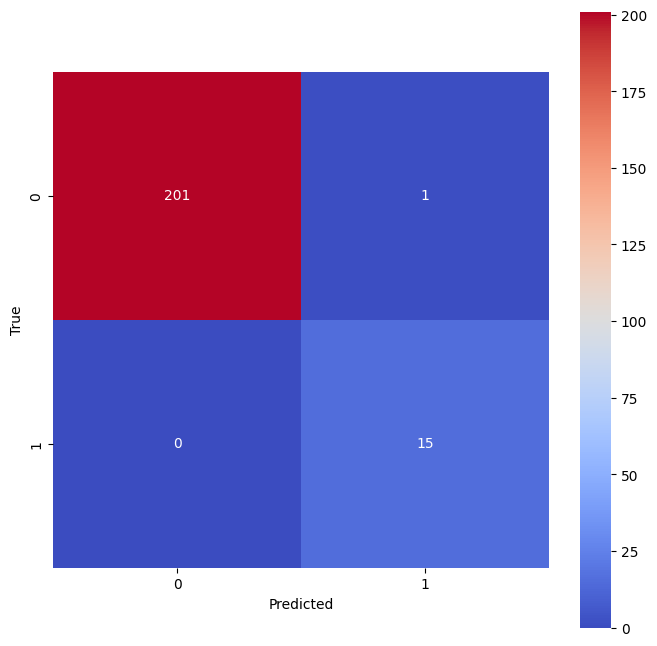

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



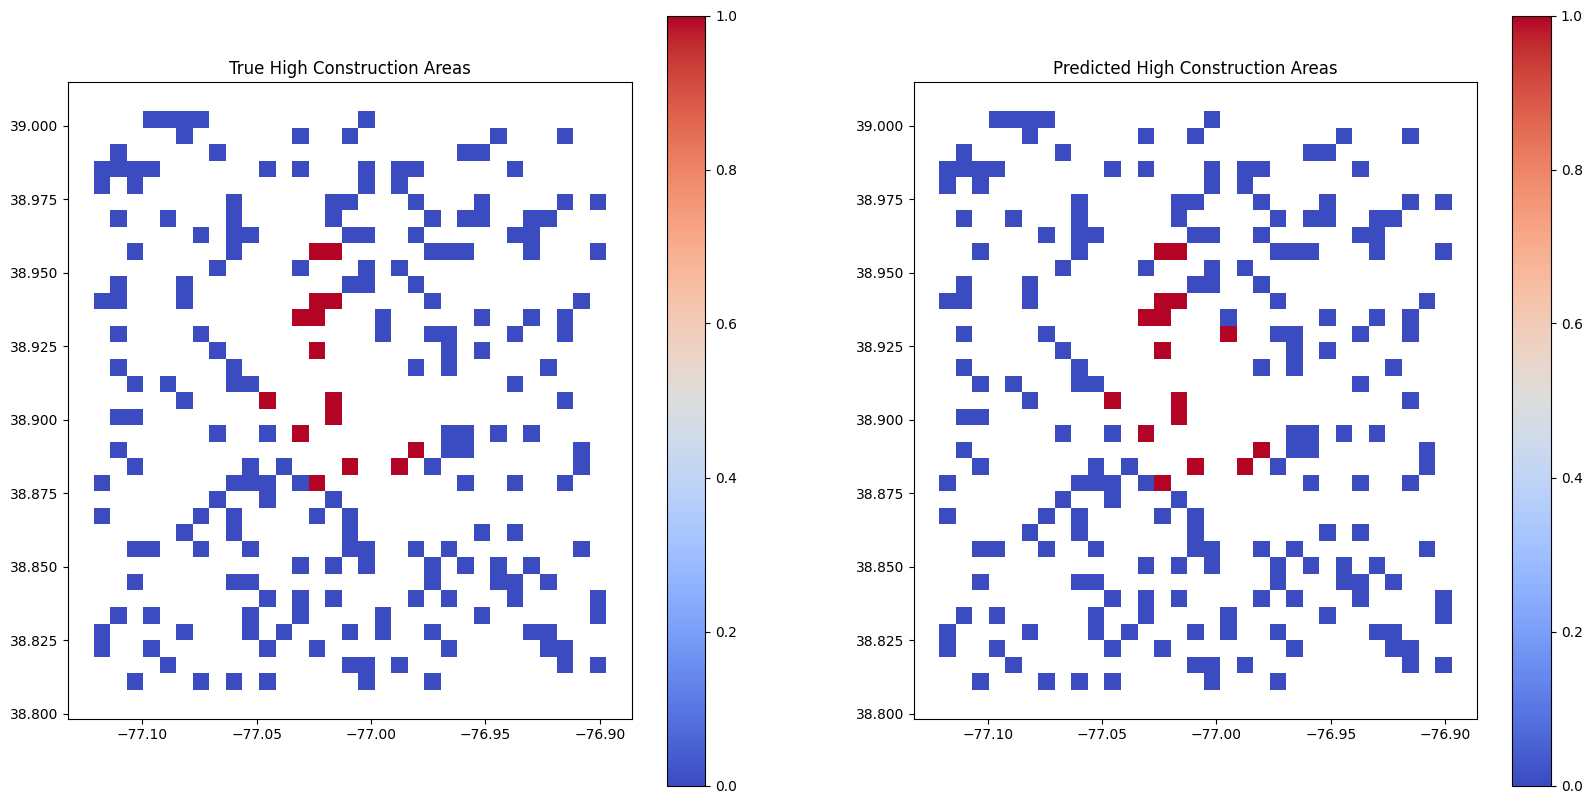

In [61]:
import geopandas as gpd

# Create a GeoDataFrame with the test data and the predicted values
test_gdf = grid.loc[X_test.index].copy()
test_gdf['predicted_high_construction'] = y_pred

# Plot the true and predicted high construction areas
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

test_gdf.plot(column='high_construction', cmap='coolwarm', legend=True, ax=ax[0])
ax[0].set_title('True High Construction Areas')

test_gdf.plot(column='predicted_high_construction', cmap='coolwarm', legend=True, ax=ax[1])
ax[1].set_title('Predicted High Construction Areas')

plt.show()


In [62]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')

# Print the mean and standard deviation of the F1 scores
print(f"Mean F1 Score: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")


Mean F1 Score: 0.99
Standard Deviation: 0.01


In [61]:
#df = pd.read_csv("../Metro_mlp_uc_sfrcondo_sm_month.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Metro_mlp_uc_sfrcondo_sm_month.csv'

In [ ]:
#df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,102001,0,United States,country,NaN,263267.0,271267.0,276633.0,280000.0,280300.0,...,387967.0,393300.0,393300.0,391300.0,386633.0,381667.0,375733.0,371900.0,371900.0,374833.0
1,394913,1,"New York, NY",msa,NY,503000.0,513000.0,521300.0,526300.0,528300.0,...,617667.0,613330.0,606330.0,599663.0,606333.0,612999.0,619333.0,619333.0,624667.0,634967.0
2,753899,2,"Los Angeles, CA",msa,CA,721333.0,735000.0,743333.0,750000.0,749667.0,...,924967.0,920633.0,910333.0,901667.0,897667.0,894333.0,887667.0,882633.0,885967.0,892967.0
3,394463,3,"Chicago, IL",msa,IL,284600.0,294600.0,300600.0,302267.0,301967.0,...,323300.0,324967.0,322967.0,319967.0,314967.0,308600.0,302933.0,299300.0,302167.0,308833.0
4,394514,4,"Dallas, TX",msa,TX,322997.0,328497.0,331797.0,332800.0,329502.0,...,432663.0,438297.0,434967.0,428300.0,419000.0,410667.0,403667.0,398000.0,396667.0,400300.0


In [63]:
! pip install osmnx

import osmnx as ox


In [65]:

place_name = "Washington, District of Columbia, USA"

# Create a graph from OpenStreetMap data
G = ox.graph_from_place(place_name, network_type='drive')


In [66]:
#38.923233391747246, -77.04401030878196 start
# 38.89048275176211, -77.02685596802488 end
import networkx as nx

origin_latitude, origin_longitude = 38.923233391747246, -77.04401030878196
destination_latitude, destination_longitude = 38.89048275176211, -77.02685596802488
# Set the origin and destination using their latitudes and longitudes
origin = (origin_latitude, origin_longitude)
destination = (destination_latitude, destination_longitude)

# Find the nearest nodes to the origin and destination
origin_node = ox.distance.nearest_nodes(G, X=[origin[1]], Y=[origin[0]])[0]
destination_node = ox.distance.nearest_nodes(G, X=[destination[1]], Y=[destination[0]])[0]

# Calculate the shortest path using Dijkstra's algorithm
shortest_path = nx.dijkstra_path(G, origin_node, destination_node, weight='length')


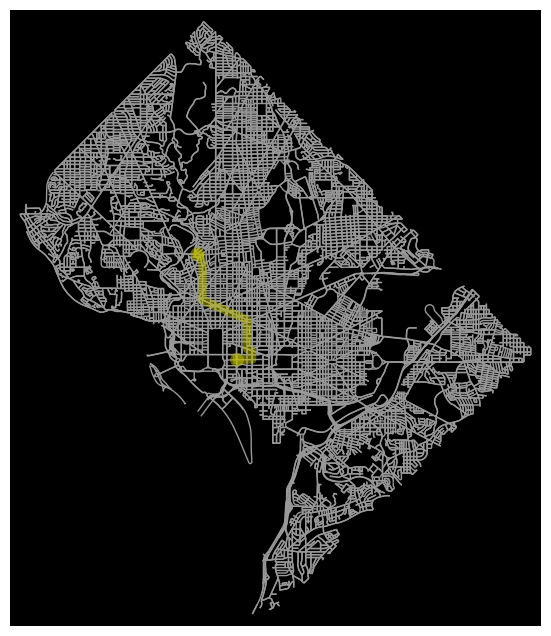

In [67]:

# Extract the coordinates of the nodes in the shortest path
shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# Plot the route
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=6, node_size=0, bgcolor='k', route_color='y')

In [69]:
! pip install geopy
import geopy.distance

def construction_impact(G, construction_data, impact_radius=500):
    for u, v, data in G.edges(data=True):
        edge_coords = (G.nodes[u]['y'], G.nodes[u]['x']), (G.nodes[v]['y'], G.nodes[v]['x'])
        edge_midpoint = ((edge_coords[0][0] + edge_coords[1][0]) / 2, (edge_coords[0][1] + edge_coords[1][1]) / 2)

        data['construction_impact'] = 0

        for construction in construction_data:
            construction_coords = (construction['latitude'], construction['longitude'])
            distance = geopy.distance.distance(edge_midpoint, construction_coords).m

            if distance < impact_radius:
                data['construction_impact'] += 1


  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [70]:
building_permits.columns

Index(['X', 'Y', 'ISSUE_DATE', 'PERMIT_ID', 'PERMIT_TYPE_NAME',
       'PERMIT_SUBTYPE_NAME', 'PERMIT_CATEGORY_NAME', 'FULL_ADDRESS',
       'DESC_OF_WORK', 'SSL', 'ZONING', 'PERMIT_APPLICANT', 'FEE_TYPE',
       'FEES_PAID', 'OWNER_NAME', 'LASTMODIFIEDDATE', 'LATITUDE', 'LONGITUDE',
       'XCOORD', 'YCOORD', 'MARADDRESSREPOSITORYID', 'WARD', 'ANC', 'SMD',
       'DISTRICT', 'PSA', 'NEIGHBORHOODCLUSTER', 'CREATED_DATE', 'cluster',
       'geometry'],
      dtype='object')

In [71]:
construction_data = [
    {"latitude": lat, "longitude": long} for lat, long in zip(building_permits.LATITUDE, building_permits.LONGITUDE) 
]



In [72]:
construction_data

[{'latitude': 38.96629823, 'longitude': -77.01336587},
 {'latitude': 38.95665171, 'longitude': -77.00166069},
 {'latitude': 38.92508664, 'longitude': -76.96782952},
 {'latitude': 38.91131851, 'longitude': -77.03696041},
 {'latitude': 38.94184315, 'longitude': -77.01394092},
 {'latitude': 38.88525864, 'longitude': -77.00327978},
 {'latitude': 38.93120656, 'longitude': -77.04105268},
 {'latitude': 38.93798143, 'longitude': -77.06089702},
 {'latitude': 38.91428654, 'longitude': -77.00247894},
 {'latitude': 38.91720745, 'longitude': -77.02624865},
 {'latitude': 38.91428654, 'longitude': -77.00247894},
 {'latitude': 38.91338439, 'longitude': -77.02338483},
 {'latitude': 38.96737402, 'longitude': -77.06462019},
 {'latitude': 38.85536207, 'longitude': -76.97961085},
 {'latitude': 38.90510347, 'longitude': -76.97707893},
 {'latitude': 38.9049911, 'longitude': -76.98942145},
 {'latitude': 38.92670066, 'longitude': -77.08045576},
 {'latitude': 38.92670066, 'longitude': -77.08045576},
 {'latitude

In [73]:
construction_impact(G, construction_data)


In [ ]:

from sklearn.model_selection import train_test_split
 
X = building_permits.drop(['ISSUE_DATE', 'high_prob'], axis=1)
y = building_permits['high_prob']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
from sklearn.ensemble import RandomForestClassifier
 
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
 
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
 
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Confusion Matrix:", confusion)
 
# building_permits['cluster'] = kmeans.labels_
cluster_counts = building_permits.groupby('cluster').size().reset_index(name='num_permits')
threshold = 5000
cluster_counts['high_prob'] = (cluster_counts['num_permits'] > threshold).astype(int)
building_permits = building_permits.merge(cluster_counts[['cluster', 'high_prob']], on='cluster', how='left')